$$Diego \space Castillo \space Reyes$$

<h1 align="center">Algoritmo de Deutsch</h1>

Crea el algoritmo de Deutsch para un qubit

In [28]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

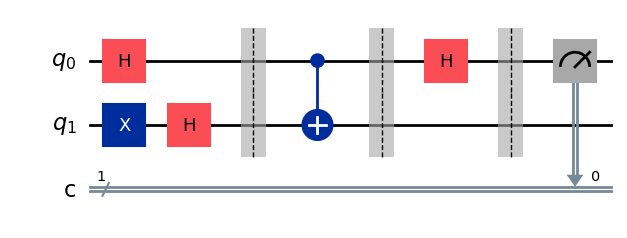

In [29]:
# Create a quantum circuit
qc = QuantumCircuit(2, 1)

qc.x(1)
# qc.barrier()
qc.h([0, 1])  # Apply Hadamard gates to both qubits at the same time
qc.barrier()
qc.cx(0, 1) # Balanced function
# qc.x(1) # Constant function
qc.barrier()
qc.h(0)
qc.barrier()

# Measure the first qubit
qc.measure(0, 0)

# Draw the circuit
qc.draw('mpl')

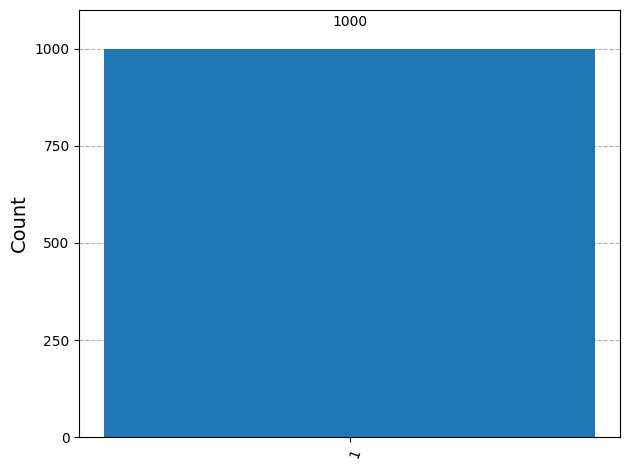

In [30]:
# Define the simulator
backend = Aer.get_backend("statevector_simulator")

# Compile the circuit
compiled_circuit = transpile(qc, backend=backend)
# Execute the circuit on the simulator
job = backend.run(compiled_circuit, shots=1000)
# Get the results of the execution
result = job.result()
# Get the counts of the results
counts = result.get_counts(qc)
# Draw the histogram of the results
plot_histogram(counts)

In [31]:
# Print whether the function is balanced or constant
print(counts)
if "1" in counts:
    print("balanced")
else:
    print("constant")

{'1': 1000}
balanced
